Дана функция **f(x) = 5x^2 + 10x - 30**
---
1. Определить корни (найти такие х при которых f(x) = 0)

2. Найти интервалы, на которых функция возрастает (f'(x) > 0)

3. Найти интервалы, на которых функция убывает (f'(x) < 0)

4. Построить график

5. Вычислить вершину (Такие х где f'(x) = 0)

6. Определить промежутки, на котором f > 0 (решить неравенство f(x)>< 0)

7. Определить промежутки, на котором f < 0

<b>Что потребуется:</b>
Решение уравнений, нахождение производных, построение графика, решение неравенств.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# from sympy import diff, expand, symbols, roots, solveset
from sympy.abc import x
import sympy as smp

k1, k2, k3 = 5, 10, -30     # k1 > 0 -> парабола направлена ветвями вверх, экстремум - минимальная точка графика
exp_f = smp.expand(k1*x**2 + k2*x + k3)
exp_f

5*x**2 + 10*x - 30

### 1. Определяем корни

In [2]:
def rts(a, b, c):
    D = b ** 2 - 4 * a * c
    d = D ** 0.5
    if D > 0:
        x1 = (-b + d) / (2 * a)
        x2 = (-b - d) / (2 * a)    
        return 2, x1, x2
    elif D == 0:
        x1 = -b / (2 * a)
        return 1, x1, x1
    else:
        return 0, 0, 0
 

res_rts = rts(k1, k2, k3)
d, x1, x2 = res_rts
if d==2: print(f'X1= {x1}, X2={x2}')
elif d==1: print(f'X1= {x1}')
else: print('Уровнение корней не имеет.')

X1= 1.6457513110645905, X2=-3.6457513110645907


### 2. Находим интервалы, на которых функция возрастает (f'(x) > 0)

In [3]:
diff_fun = smp.diff(exp_f, x) # дифферинциал функции
diff_fun

10*x + 10

In [4]:
extr_x = smp.solveset(diff_fun, x)  # экстремум x
extr_x

{-1}

In [5]:
x_top = next(iter(extr_x)) # преобразование в int значения X
print(f'({x_top}, +∞)')

(-1, +∞)


In [6]:
grow_f = smp.solve(diff_fun > 0)
grow_f

(-1 < x) & (x < oo)

### 3. Найти интервалы, на которых функция убывает (f'(x) < 0)

In [7]:
print(f'(-∞, {x_top})')

(-∞, -1)


In [8]:
drop_f = smp.solve(diff_fun < 0)
drop_f

(-oo < x) & (x < -1)

### 4. Строим график

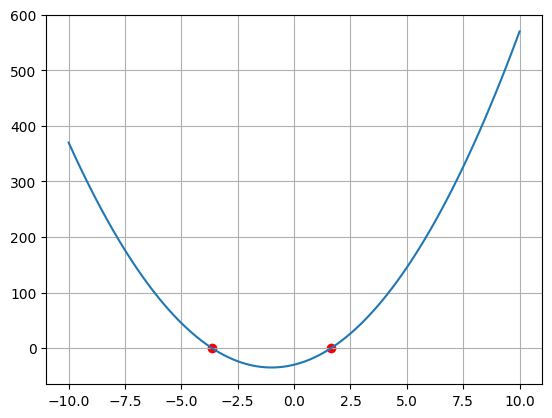

In [9]:
if isinstance(res_rts, tuple):
    points = x1, x2
    y0 = 0, 0
    plt.scatter(points, y0, color='red')
else:
    x = rts
    points = x
    y0 = 0
    plt.scatter(points, y0, color='red')
 
 
freq = 100  # частота дискретизации типо
a, b = -10, 10  # здесь ручками выставляем пределы по оси икс
 
# квадратичная функция
xi = np.linspace(a, b, freq)
yi = [k1 * t * t + k2 * t + k3 for t in xi]
plt.plot(xi, yi) 
 
plt.grid()
plt.show()

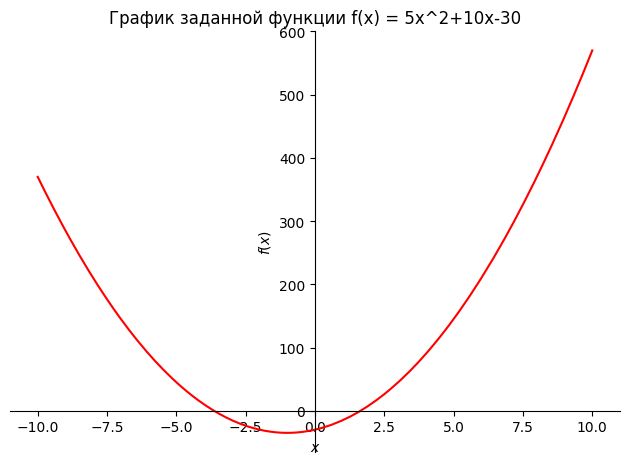

In [10]:
graf = smp.plot(exp_f, line_color='red', title='График заданной функции f(x) = 5x^2+10x-30')

### 5. Вычислить вершину (Такие х где f'(x) = 0)

In [11]:
y_top = k1 * x_top**2 + k2 * x_top + k3
print(f'Вершина бараболы, точка с координатами ({x_top}, {y_top}).')

Вершина бараболы, точка с координатами (-1, -35).


In [12]:
top_x = smp.solve(diff_fun)
top_x

[-1]

### 6. Определить промежутки, на котором f > 0 (решить неравенство f(x)>< 0)

In [13]:
pozit = smp.solve(exp_f > 0)
pozit

((x < oo) & (-1 + sqrt(7) < x)) | ((-oo < x) & (x < -sqrt(7) - 1))

### 7. Определить промежутки, на котором f(x) < 0

In [14]:
negat = smp.solve(exp_f < 0)
negat

(x < -1 + sqrt(7)) & (-sqrt(7) - 1 < x)